In [1]:
from sklearn.datasets import load_digits
digits = load_digits()

In [5]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [6]:
X, y = digits.data, digits.target

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)

In [8]:
#Feature Scaling Not required for this dataset

In [9]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

In [10]:
# AdaBoost
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(X_train, y_train)

C:\Users\jenil\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(n_estimators=100, random_state=42)

In [11]:
import warnings
warnings.filterwarnings("ignore")

In [12]:
# Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [13]:
# XGBoost
xgb = XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [15]:
from sklearn.metrics import classification_report, accuracy_score

for model, name in [(ada, "AdaBoost"), (gb, "Gradient Boosting"), (xgb, "XGBoost")]:
    y_pred = model.predict(X_test)
    print(f"\n{name} Results:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))



AdaBoost Results:
Accuracy: 0.4861111111111111
              precision    recall  f1-score   support

           0       0.59      0.36      0.45        36
           1       0.60      0.50      0.55        36
           2       0.32      0.74      0.45        35
           3       0.58      0.38      0.46        37
           4       0.78      0.78      0.78        36
           5       0.84      0.70      0.76        37
           6       0.31      0.25      0.28        36
           7       0.62      0.64      0.63        36
           8       0.26      0.40      0.32        35
           9       0.24      0.11      0.15        36

    accuracy                           0.49       360
   macro avg       0.51      0.49      0.48       360
weighted avg       0.52      0.49      0.48       360


Gradient Boosting Results:
Accuracy: 0.9555555555555556
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        36
           1       0.94    

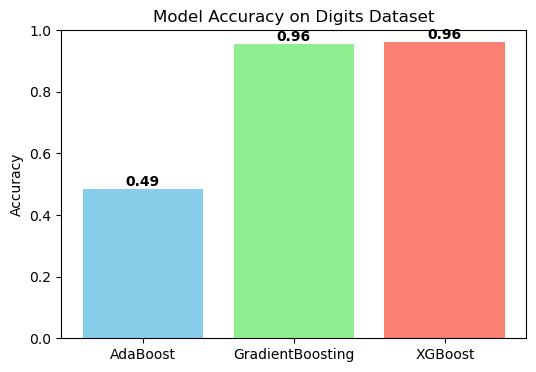

In [16]:
import matplotlib.pyplot as plt

# Results from your Digits experiment
models = ["AdaBoost", "GradientBoosting", "XGBoost"]
accuracy = [0.4861, 0.9556, 0.9611]

plt.figure(figsize=(6,4))
plt.bar(models, accuracy, color=["skyblue", "lightgreen", "salmon"])
plt.title("Model Accuracy on Digits Dataset")
plt.ylabel("Accuracy")
plt.ylim(0,1)  # accuracy is between 0 and 1
for i, v in enumerate(accuracy):
    plt.text(i, v+0.01, f"{v:.2f}", ha='center', fontweight="bold")
plt.show()
